# Best Manga

In [99]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [100]:
bestM_df = pd.read_csv(\best-selling-manga.csv")

## Data Frame Exploration

### Shape, head and Data types

In [101]:
print("Shape of the data frame",bestM_df.shape)
bestM_df.head()

Shape of the data frame (187, 8)


,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [102]:
bestM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [103]:
bestM_df.isna().sum()

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

### Memory Usage

In [104]:
bestM_df.memory_usage(deep=True).sum()

80626

## Change Data Types

### float64 to float16

In [105]:
bestM_df['Average sales per volume in million(s)'] = bestM_df['Average sales per volume in million(s)'].astype('float16')
bestM_df['Approximate sales in million(s)'] = bestM_df['Approximate sales in million(s)'].astype('float16')

### int64 change

In [106]:
bestM_df['No. of collected volumes'].max()

207

Since the max value is 207 we can change it to int16

In [107]:
bestM_df['No. of collected volumes'] = bestM_df['No. of collected volumes'].astype('int16')

In [108]:
print('The max value',bestM_df['No. of collected volumes'].max(),'The min age',bestM_df['No. of collected volumes'].min())


The max value 207 The min age 5


### Memory usage check

In [109]:
bestM_df.memory_usage(deep=True).sum()

77260

Not significant but still it is a good practice

## Add New Columns

Adding few columns for better Exploration of the data

### Year start and Year End Columns

In [110]:
# bestM_df[Serialized_YearStart] = bestM_df['Serialized'].str.extract(r'(\d{4})') 
bestM_df['YearStart'] = bestM_df['Serialized'].str.extract(r'(\d{4})')
bestM_df['YearEnd'] = bestM_df['Serialized'].str.extract(r'(\d{4}(?=\s|$)|present)')

# Find and values as present and change to 2023
bestM_df.loc[bestM_df['YearEnd'] == 'present', 'YearEnd'] = 2023

# Change to int for Year start and year end
bestM_df[['YearStart','YearEnd']] = bestM_df[['YearStart','YearEnd']].astype('int16')



### Number of Authors

In [111]:
bestM_df['Author Count'] = (bestM_df['Author(s)'].str.count(',')+1).astype('int8')

### Final Memory Use Check and Data Frame Check

In [112]:
print("Memory Usage",bestM_df.memory_usage(deep=True).sum())
bestM_df.head()

Memory Usage 78195


,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),YearStart,YearEnd,Author Count
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.5,4.968750,1997,2023,1
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.450195,1968,2023,2
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.650391,1994,2023,1
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.191406,1984,1995,1
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.710938,1969,1996,1


## EDA
### Demographics Questions  
#### Number of unique Demographics or Genre

In [113]:
print("Count of unique demographics", bestM_df['Demographic'].nunique())

(
    bestM_df['Demographic']
    .unique()
)

Count of unique demographics 9


array(['Shōnen', 'Seinen', 'Children', 'Shōnen/Seinen', '—', 'Shōjo',
       'Josei', 'Shōjo/Josei', 'Shōnen/shōjo/Josei'], dtype=object)

#### Mange Series per demography

In [114]:
(
    bestM_df
    .groupby('Demographic')
    ['Manga series']
    .count()
    .sort_values(ascending=False)
)

Demographic
Shōnen                101
Seinen                 50
Shōjo                  21
Shōnen/Seinen           6
Children                4
Josei                   2
Shōjo/Josei             1
Shōnen/shōjo/Josei      1
—                       1
Name: Manga series, dtype: int64

#### Demographics affect on sales and Avg Sales

In [115]:
(
    bestM_df
    .groupby('Demographic')
    [['Approximate sales in million(s)', 'Average sales per volume in million(s)']]
    .mean()
    .sort_values('Approximate sales in million(s)', ascending=False)
    
)

,Approximate sales in million(s),Average sales per volume in million(s)
Demographic,,
—,86.000000,1.910156
Children,80.300781,1.552673
Shōnen/Seinen,75.000000,0.955078
Shōnen,58.130726,1.628565
Seinen,39.826874,0.968643
Josei,33.500000,1.125244
Shōjo,31.147322,1.292922
Shōjo/Josei,27.000000,0.330078
Shōnen/shōjo/Josei,25.000000,1.080078


### Manga sales Distribution 

Distribution of approximate sales for manga series

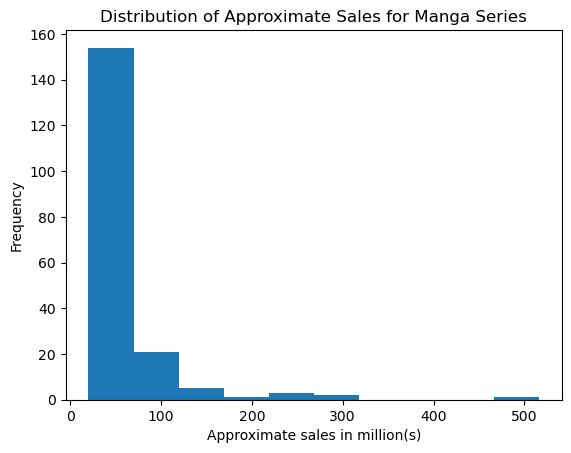

In [116]:
plt.hist(bestM_df['Approximate sales in million(s)'])
plt.xlabel('Approximate sales in million(s)')
plt.ylabel('Frequency')
plt.title('Distribution of Approximate Sales for Manga Series')
plt.show()

### Highest Selling Manga

In [122]:
bestM_df.nlargest(10,'Approximate sales in million(s)')[['Manga series', 'Approximate sales in million(s)','YearStart']]

,Manga series,Approximate sales in million(s),YearStart
0,One Piece,516.5,1997
1,Golgo 13,300.0,1968
2,Case Closed / Detective Conan,270.0,1994
3,Dragon Ball,260.0,1984
4,Doraemon,250.0,1969
5,Naruto,250.0,1999
6,Slam Dunk,170.0,1990
7,KochiKame: Tokyo Beat Cops,156.5,1976
8,Demon Slayer: Kimetsu no Yaiba,150.0,2016
9,Oishinbo,135.0,1983


### Highest Average Sales Per Vol

In [118]:
bestM_df.nlargest(10,'Average sales per volume in million(s)')[['Manga series', 'Average sales per volume in million(s)']]


,Manga series,Average sales per volume in million(s)
50,Devilman,10.000000
8,Demon Slayer: Kimetsu no Yaiba,6.519531
3,Dragon Ball,6.191406
6,Slam Dunk,5.480469
0,One Piece,4.968750
4,Doraemon,4.710938
13,Astro Boy,4.351562
27,YuYu Hakusho,4.101562
17,Touch,3.849609
14,Fist of the North Star,3.699219


### Plot of the number of collected volumes and sales

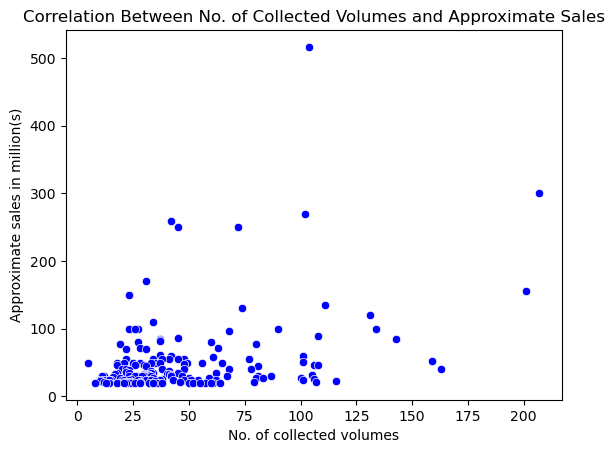

In [119]:
sns.scatterplot(data=bestM_df, x='No. of collected volumes', y='Approximate sales in million(s)', color ='blue')

# Labels and Title 
plt.xlabel('No. of collected volumes')
plt.ylabel('Approximate sales in million(s)')
plt.title('Correlation Between No. of Collected Volumes and Approximate Sales')

plt.show()

### Trend of Average sales changes over the years

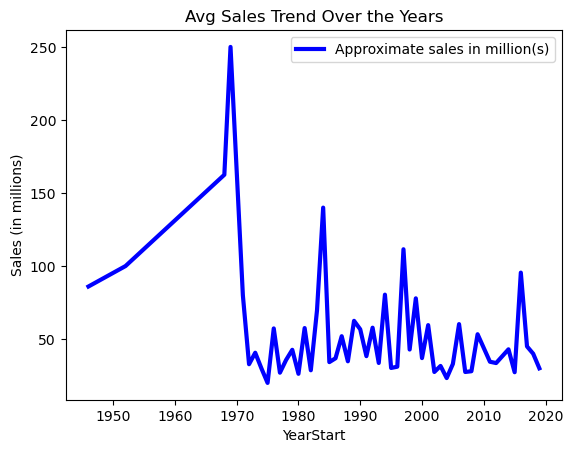

In [120]:
salesOverYears = bestM_df.groupby('YearStart')[['Approximate sales in million(s)']].mean()

salesOverYears.plot.line(color='blue', linewidth=3,)
plt.ylabel('Sales (in millions)')
plt.title('Avg Sales Trend Over the Years')
plt.show()


### Correlation Heatmap 

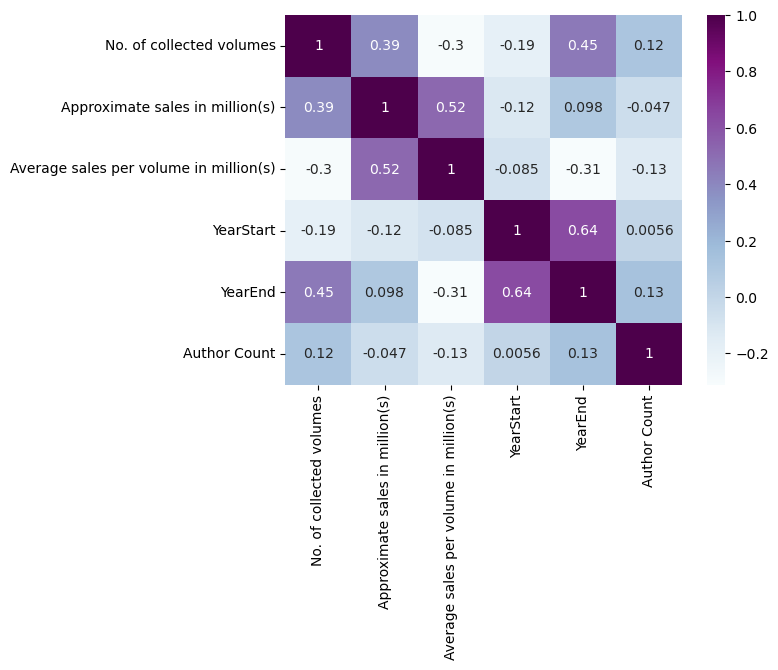

In [121]:
corr_df = bestM_df.corr(numeric_only=True)

sns.heatmap(corr_df,annot=True, cmap='BuPu')

plt.show()

## Linear Regression